![Imagem 1](imagens/internet-1593384_1920.jpg)

# Análise de Crédito

O projeto de *Machine Learning* para Previsão de Crédito usa o conjunto de dados *"Credit Card Approval Clean Data"* do repositório UCI Machine Learning para treinar e testar um capaz de prever se uma pessoa será bem-sucedida em aplicar para uma cartão de crédito. A análise de dados é realizada para identificar padrões e tendências nos dados, seguido de treinamento de algoritmos de classificação para prever resultados com base nas características dos solicitantes de cartão de crédito. O objetivo deste projeto é ajudar instituições financeiras a tomar decisões mais informadas sobre aprovação de crédito.

In [1]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Derica S. Sousa" -e "drksbr@proton.me" -ws "https://sousade.wordpress.com/" -v --iversions 


Author: Derica S. Sousa

Email: drksbr@proton.me

Website: https://sousade.wordpress.com/

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.4.0



## Sobre o dataset

Este conjunto de dados contém uma versão limpa do *dataset* "*Credit Card Approval Clean Data*" do repositório UCI Machine Learning sobre aprovações de cartão de crédito.

Os valores ausentes foram preenchidos e os nomes foram inferidos, resultando em contexto mais simples para ser utilizado.

Source: [https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data]

### 1.1 Dicionário de Dados

- **Gender:** 0=Feminino, 1=Masculino
- **Age:** idade em anos
- **Debt:** dívida pendente (a característica foi escalonada)
- **Married:** 0=Solteiro/Divorciado/etc, 1=Casado
- **Bank customer:** 0=não tem uma conta bancária, 1=tem uma conta bancária
- **Industry:** setor de trabalho atual ou mais recente
- **Ethnicity:**
- **Years employed:**
- **Prior default:** 0=sem inadimplência anterior, 1=inadimplência anterior
- **Employed:**  0=não empregado, 1=empregado
- **Credit score:** (esta característica foi escalonada)
- **Drivers license:**  0=sem licença, 1=tem licença
- **Citizenship:** ou Nascido, PorOutrosMeios ou Temporário
- **ZipCode:** código postal
- **Income:** (esta característica foi escalonada)
- **Approved:** 0=não aprovado, 1=aprovado

### Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.metrics import confusion_matrix, recall_score, f1_score, ConfusionMatrixDisplay, precision_score, classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Compreensão dos Dados

In [4]:
df = pd.read_csv("archive/clean_dataset.csv", sep=",")
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
print("Número de colunas:\n{}\nNúmero de linhas:\n{}\n".format(df.shape[1], df.shape[0]))

Número de colunas:
16
Número de linhas:
690



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


# Análise Exploratória de Dados

In [7]:
# Como boa prática, geramos uma cópia do dataframe para que se possa realizar as alterações necessárias
df_copy = df.copy()

In [8]:
df_copy.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [9]:
df_copy.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [10]:
# Alterando o tipo das colunas Age e YearsEmployed 
df_copy[["Age", "YearsEmployed"]] = df_copy[["Age", "YearsEmployed"]].apply(lambda x: x.astype("int"))

In [11]:
df_copy[["Age", "YearsEmployed"]].dtypes

Age              int32
YearsEmployed    int32
dtype: object

In [12]:
# Transformando colunas "object" em "categorical"
df_copy[["cat_Industry", "cat_Ethnicity", "cat_Citizen"]] = df_copy[['Industry', 'Ethnicity', 'Citizen']].apply(
    lambda x: x.astype('category'))

In [13]:
df_copy.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,cat_Industry,cat_Ethnicity,cat_Citizen
0,1,30,0.000,1,1,Industrials,White,1,1,1,1,0,ByBirth,202,0,1,Industrials,White,ByBirth
1,0,58,4.460,1,1,Materials,Black,3,1,1,6,0,ByBirth,43,560,1,Materials,Black,ByBirth
2,0,24,0.500,1,1,Materials,Black,1,1,0,0,0,ByBirth,280,824,1,Materials,Black,ByBirth
3,1,27,1.540,1,1,Industrials,White,3,1,1,5,1,ByBirth,100,3,1,Industrials,White,ByBirth
4,1,20,5.625,1,1,Industrials,White,1,1,0,0,0,ByOtherMeans,120,0,1,Industrials,White,ByOtherMeans


In [14]:
df_copy.shape

(690, 19)

In [15]:
df2 = df_copy.copy()

In [16]:
df2.drop(columns=["Industry", "Ethnicity", "Citizen"], axis=1, inplace=True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          690 non-null    int64   
 1   Age             690 non-null    int32   
 2   Debt            690 non-null    float64 
 3   Married         690 non-null    int64   
 4   BankCustomer    690 non-null    int64   
 5   YearsEmployed   690 non-null    int32   
 6   PriorDefault    690 non-null    int64   
 7   Employed        690 non-null    int64   
 8   CreditScore     690 non-null    int64   
 9   DriversLicense  690 non-null    int64   
 10  ZipCode         690 non-null    int64   
 11  Income          690 non-null    int64   
 12  Approved        690 non-null    int64   
 13  cat_Industry    690 non-null    category
 14  cat_Ethnicity   690 non-null    category
 15  cat_Citizen     690 non-null    category
dtypes: category(3), float64(1), int32(2), int64(10)
memory usage: 

In [18]:
df2.shape

(690, 16)

O Intervalo Interquartil (IQR) é uma medida de dispersão de dados que fornece informações sobre a distribuição dos valores em uma série de dados. Ele representa a distância entre o primeiro quartil (25%) e o terceiro quartil (75%) dos dados, onde o primeiro quartil representa o limite inferior da distribuição e o terceiro quartil representa o limite superior da distribuição.

O IQR é uma medida mais robusta que o desvio padrão, pois é menos afetado por outliers ou valores extremos. Isso significa que o IQR é uma medida mais estável da dispersão dos dados em comparação com o desvio padrão.

Ao calcular o IQR, é possível identificar outliers no conjunto de dados. Um valor é considerado um outlier se estiver fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], onde Q1 é o primeiro quartil e Q3 é o terceiro quartil. Essa definição de outliers é baseada na regra de Tukey, que é amplamente utilizada na análise de dados. 

In [19]:
# Definindo uma função para sumarização dos dados

def summarize_data(data):
    summary = data.describe().transpose()
    summary['IQR'] = summary['75%'] - summary['25%']
    summary = summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]
    return summary

In [20]:
summary = summarize_data(df_copy)
summary

,count,mean,std,min,25%,50%,75%,max,IQR
Gender,690.0,0.695652,0.460464,0.0,0.0,1.00,1.0000,1.0,1.0000
Age,690.0,31.066667,11.859906,13.0,22.0,28.00,37.0000,80.0,15.0000
Debt,690.0,4.758725,4.978163,0.0,1.0,2.75,7.2075,28.0,6.2075
Married,690.0,0.760870,0.426862,0.0,1.0,1.00,1.0000,1.0,0.0000
BankCustomer,690.0,0.763768,0.425074,0.0,1.0,1.00,1.0000,1.0,0.0000
YearsEmployed,690.0,1.939130,3.328080,0.0,0.0,1.00,2.0000,28.0,2.0000
PriorDefault,690.0,0.523188,0.499824,0.0,0.0,1.00,1.0000,1.0,1.0000
Employed,690.0,0.427536,0.495080,0.0,0.0,0.00,1.0000,1.0,1.0000
CreditScore,690.0,2.400000,4.862940,0.0,0.0,0.00,3.0000,67.0,3.0000
DriversLicense,690.0,0.457971,0.498592,0.0,0.0,0.00,1.0000,1.0,1.0000


In [21]:
# Quais são os valores nulos no dataframe?
df2.isnull().any().sum()

0

In [22]:
# Quais são os valores NAN no dataframe?
df2.isna().any().sum()

0

## Plots

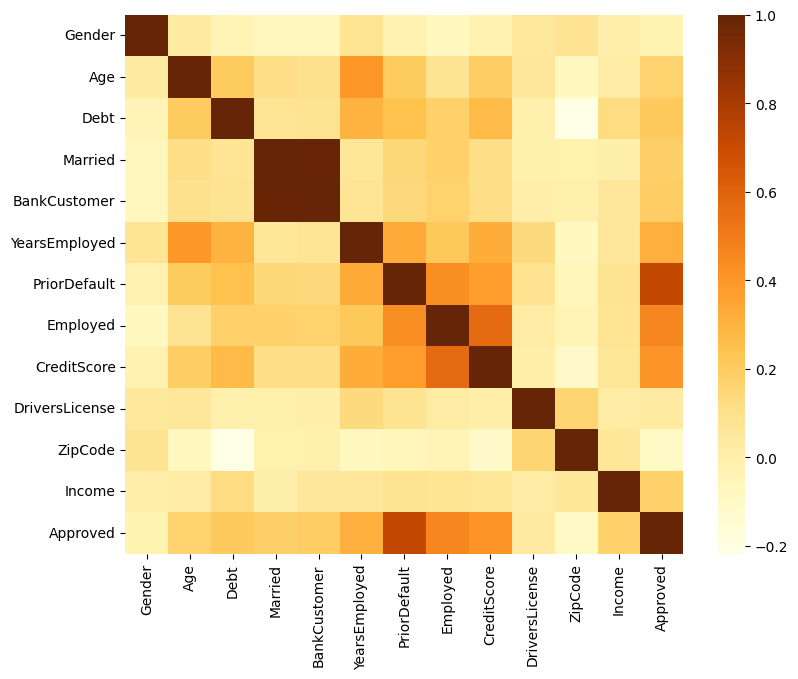

In [23]:
corr = df2.corr()
plt.figure(figsize=(9, 7))
hm = sns.heatmap(corr, annot=False, cmap="YlOrBr") 
plt.show()

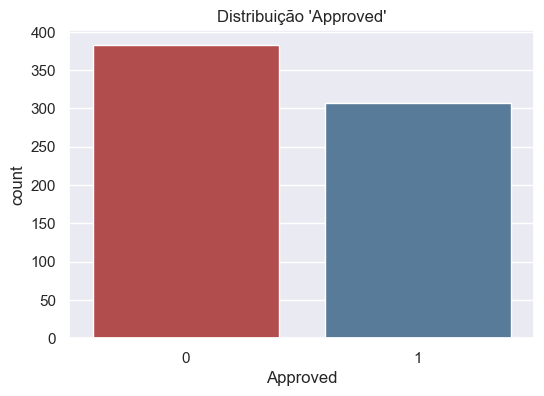

In [24]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df2["Approved"], palette="Set1", saturation = 0.5)
ax.set(title="Distribuição 'Approved'")
plt.show();

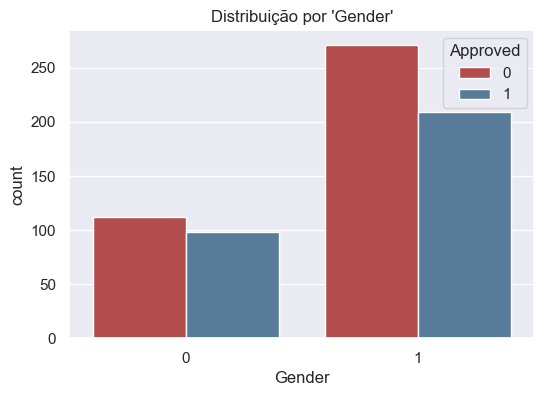

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df2, x="Gender", hue="Approved", palette="Set1", saturation = 0.5)
ax.set(title="Distribuição por 'Gender'");

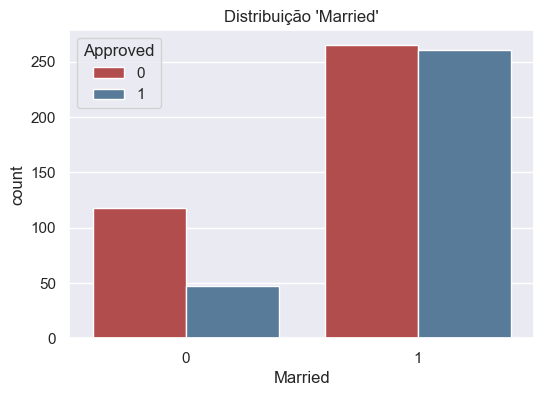

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df2, x="Married", hue="Approved", palette="Set1", saturation = 0.5)
ax.set(title="Distribuição 'Married'");

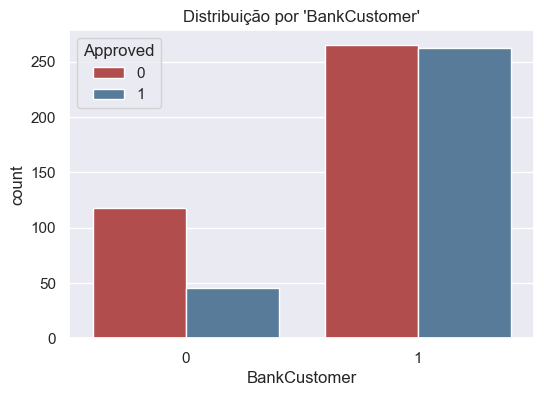

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df2, x="BankCustomer", hue="Approved", palette="Set1", saturation = 0.5)
ax.set(title="Distribuição por 'BankCustomer'");

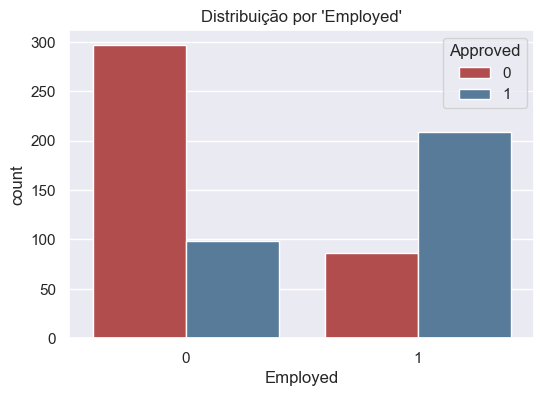

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df2, x="Employed", hue="Approved", palette="Set1", saturation = 0.5)
ax.set(title="Distribuição por 'Employed'");


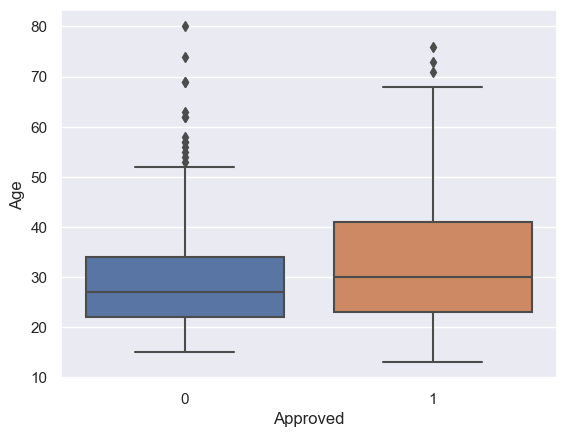

In [29]:
# Verificar a relação entre idade e aprovação de crédito
sns.boxplot(x='Approved', y='Age', data=df2)
plt.show()

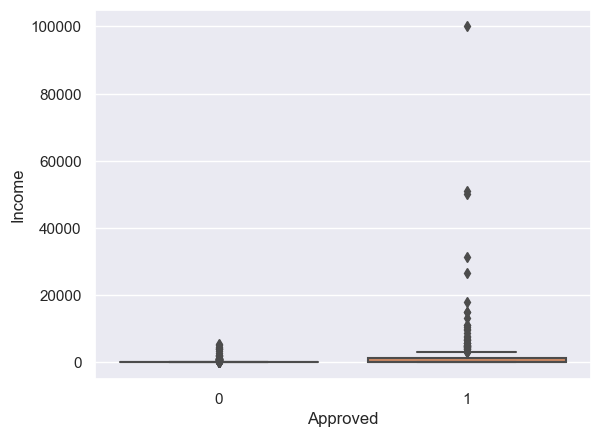

In [30]:
# Verificar a relação entre renda e aprovação de crédito
sns.boxplot(x='Approved', y='Income', data=df2)
plt.show()

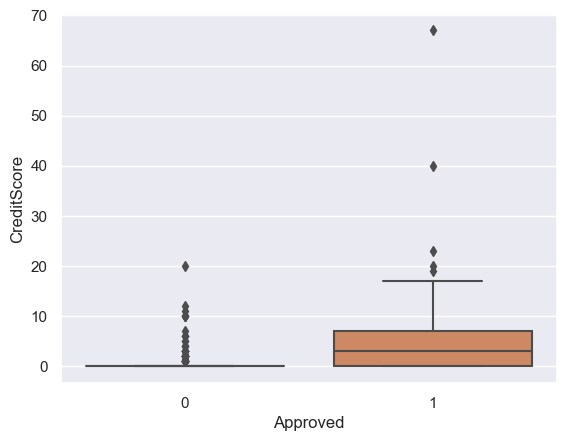

In [31]:
# Verificar a relação entre pontuação de crédito e aprovação de crédito
sns.boxplot(x='Approved', y='CreditScore', data=df2)
plt.show()

In [32]:
colunas = ["Age", "Debt", "YearsEmployed", "CreditScore"]
cores = ["skyblue", "olive", "gold", "teal"]

In [33]:
def plot_multiple_distplots_subplots(dataframe, columns,colors,n_cols=2):
    n = len(columns)
    plt.figure(figsize=(15,12))
    for i,col in enumerate(columns):
        plt.subplot(n//n_cols + 1, n_cols, i+1)
        sns.distplot(dataframe[col], kde=True, color=colors[i])
        plt.xlabel(col)
        plt.title(f'Distribuição de {col}')
    plt.tight_layout()
    plt.show()

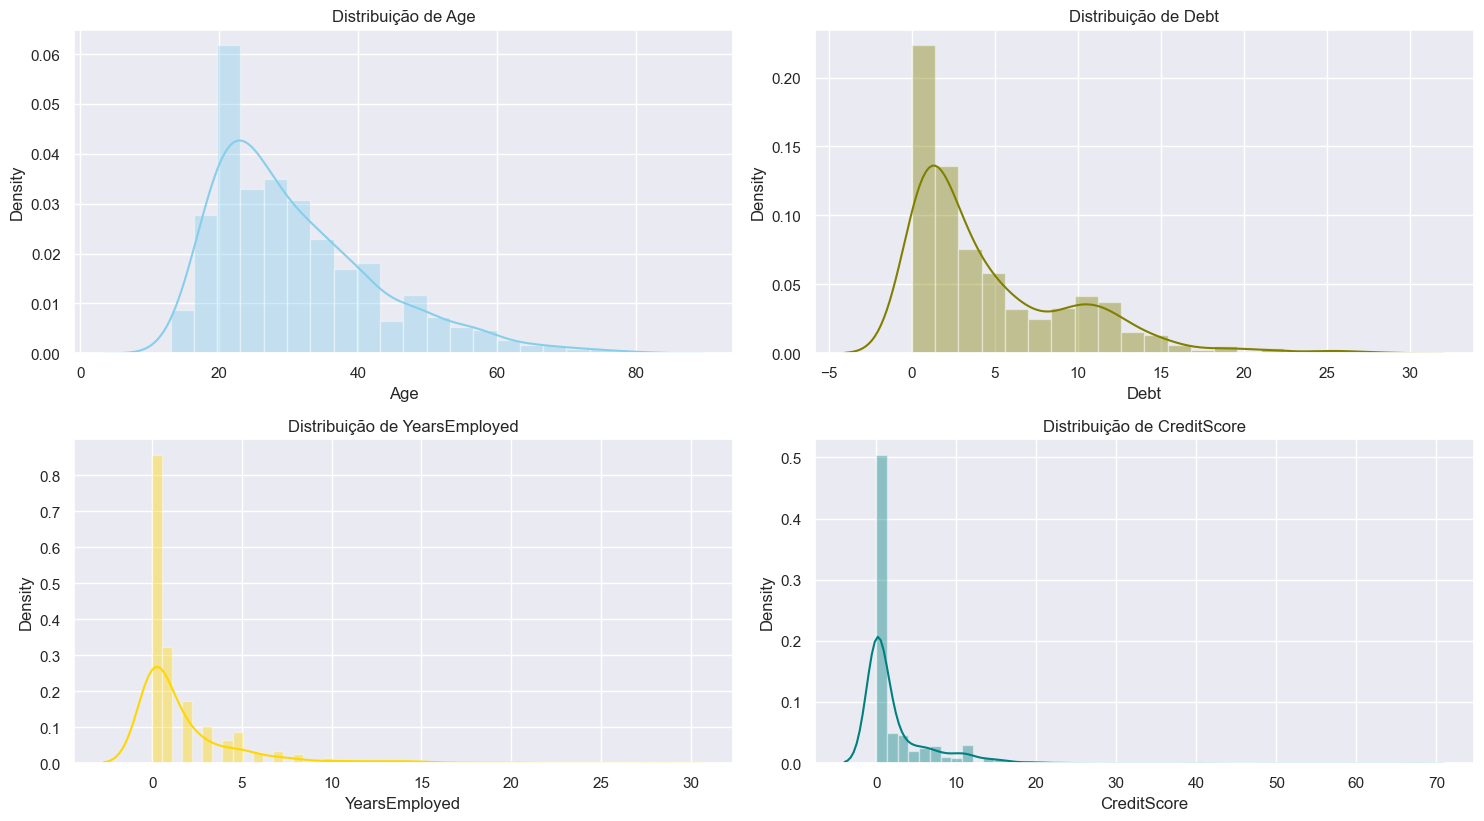

In [34]:
plot_multiple_distplots_subplots(df2, colunas, cores)

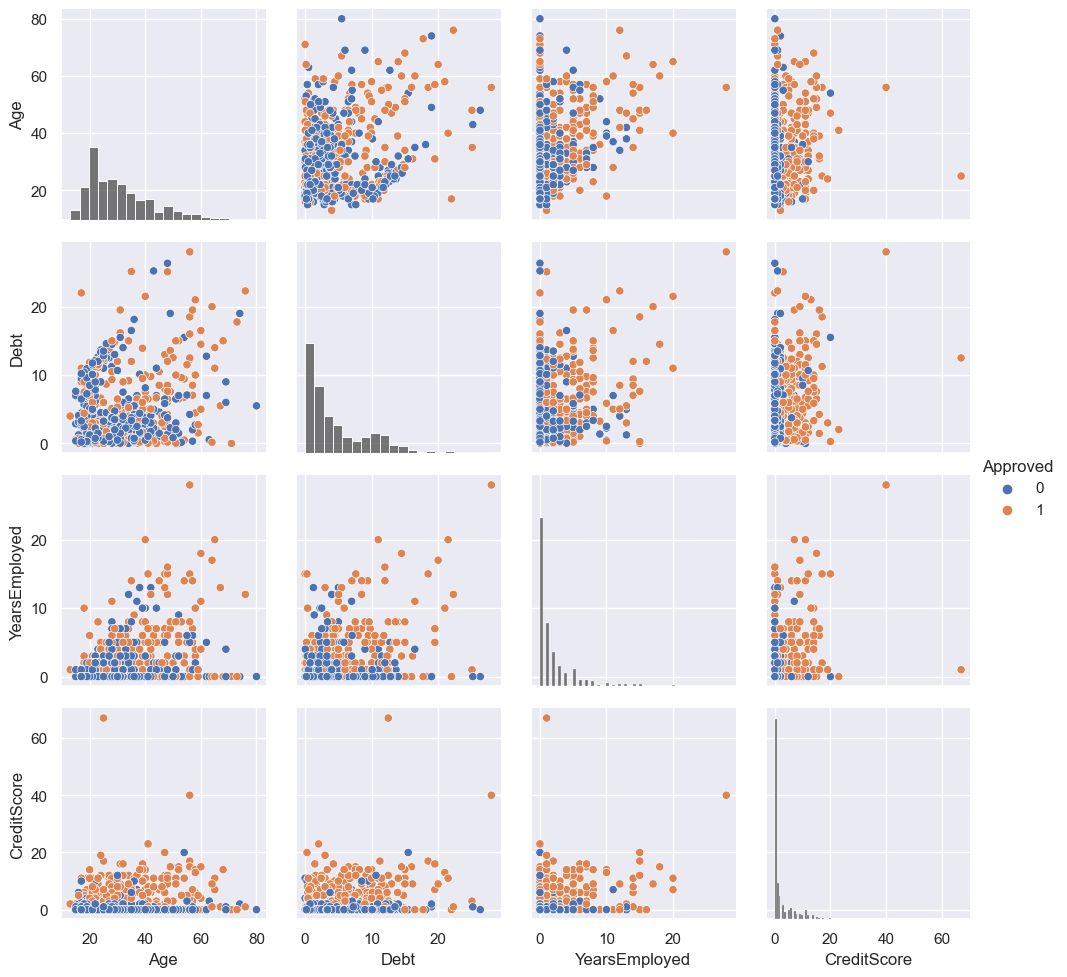

In [35]:
variables = ["Age", "Debt", "YearsEmployed", "CreditScore"]
g = sns.PairGrid(df2, vars=variables, hue="Approved")
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();


# Construção do Modelo 

In [36]:
# Variáveis independentes
X = df2.drop(["Approved", "ZipCode", "cat_Industry", "cat_Ethnicity", "cat_Citizen"], axis=1)
# Variável dependente
y = df2["Approved"]
X.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
0,1,30,0.000,1,1,1,1,1,1,0,0
1,0,58,4.460,1,1,3,1,1,6,0,560
2,0,24,0.500,1,1,1,1,0,0,0,824
3,1,27,1.540,1,1,3,1,1,5,1,3
4,1,20,5.625,1,1,1,1,0,0,0,0


In [37]:
list(X)

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Income']

In [38]:
X.dtypes

Gender              int64
Age                 int32
Debt              float64
Married             int64
BankCustomer        int64
YearsEmployed       int32
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Income              int64
dtype: object

In [39]:
X.shape

(690, 11)

In [40]:
y.shape

(690,)

# Versão (V1) com Regressão Logística

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model_v1 = LogisticRegression()
model_v1.fit(X_train, y_train)
y_pred_v1 = model_v1.predict(X_test)

In [42]:
print("Logistic Regression Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_pred_v1))
print("Precision: ", precision_score(y_test, y_pred_v1))
print("Recall: ", recall_score(y_test, y_pred_v1))
print("F1 Score: ", f1_score(y_test, y_pred_v1))

Logistic Regression Metrics:
Accuracy:  0.8188405797101449
Precision:  0.8260869565217391
Recall:  0.8142857142857143
F1 Score:  0.8201438848920863


In [43]:
log_acc = accuracy_score(y_test, y_pred_v1)
log_acc

0.8188405797101449

In [44]:
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_v1))

Confusion Matrix:
 [[56 12]
 [13 57]]


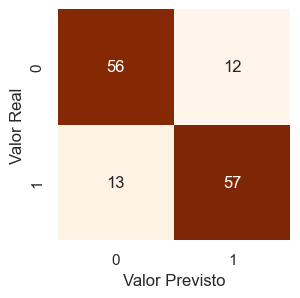

In [45]:
plt.figure(figsize=(3, 3))
# Constrói a matriz de confusão
matrix = confusion_matrix(y_test, y_pred_v1)
# Cria o gráfico
sns.heatmap(matrix, annot=True, cmap="Oranges", fmt="d", cbar=False)
# Adiciona rótulos aos eixos
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
# Exibi o gráfico
plt.show()

In [46]:
v1 = pd.DataFrame({"valor_atual":y_test,"valor_previsto":y_pred_v1})
v1.head()

,valor_atual,valor_previsto
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0


# Feature Selection

Feature selection é um processo importante na construção de modelos de classificação de aprendizado de máquina. O objetivo é selecionar as características mais relevantes para o problema em questão, a fim de melhorar a precisão do modelo e evitar o overfitting. Existem várias técnicas de seleção de recursos, como filtragem, envoltório e seleção de recursos embutidos. A filtragem é baseada em medidas estatísticas, como a correlação ou a importância relativa das características. A envoltório é baseada em algoritmos de aprendizado de máquina, enquanto a seleção de recursos embutidos é realizada durante o treinamento do próprio modelo. É importante notar que a seleção de recursos deve ser realizada antes do treinamento do modelo, pois pode influenciar significativamente os resultados finais.

In [47]:
# Criando o classificador 
clf = DecisionTreeClassifier(max_leaf_nodes=20)
clf

DecisionTreeClassifier(max_leaf_nodes=20)

In [48]:
feature_selection = RFE(clf, n_features_to_select=6, step=1)
fs = feature_selection.fit(X, y)

In [49]:
# Escolha das variáveis de entrada
fs.support_

array([False,  True,  True, False, False,  True,  True, False,  True,
       False,  True])

In [50]:
# Rangkin dos atributos
fs.ranking_

array([6, 1, 1, 5, 2, 1, 1, 4, 1, 3, 1])

In [51]:
# Ranking mais os resultados para cada atributo
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, fs.support_[i], fs.ranking_[i]))


Column: 0, Selected False, Rank: 6.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 4.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 3.000
Column: 10, Selected True, Rank: 1.000


De acordo com o ranking de seleção das variáveis, o próximo modelo será construído com as seguintes variáveis:
- Age, Debt, YearsEmployed, PriorDefault, CreditScore, Income

In [52]:
X_new = X[["Age", "Debt", "YearsEmployed", "PriorDefault", "CreditScore", "Income"]]

In [53]:
X_new.describe().round()

,Age,Debt,YearsEmployed,PriorDefault,CreditScore,Income
count,690.0,690.0,690.0,690.0,690.0,690.0
mean,31.0,5.0,2.0,1.0,2.0,1017.0
std,12.0,5.0,3.0,0.0,5.0,5210.0
min,13.0,0.0,0.0,0.0,0.0,0.0
25%,22.0,1.0,0.0,0.0,0.0,0.0
50%,28.0,3.0,1.0,1.0,0.0,5.0
75%,37.0,7.0,2.0,1.0,3.0,396.0
max,80.0,28.0,28.0,1.0,67.0,100000.0


In [54]:
cores = ["blue", "green", "red", "cyan", "magenta", "yellow"]
col = ["Age", "Debt", "YearsEmployed", "CreditScore", "Income"]

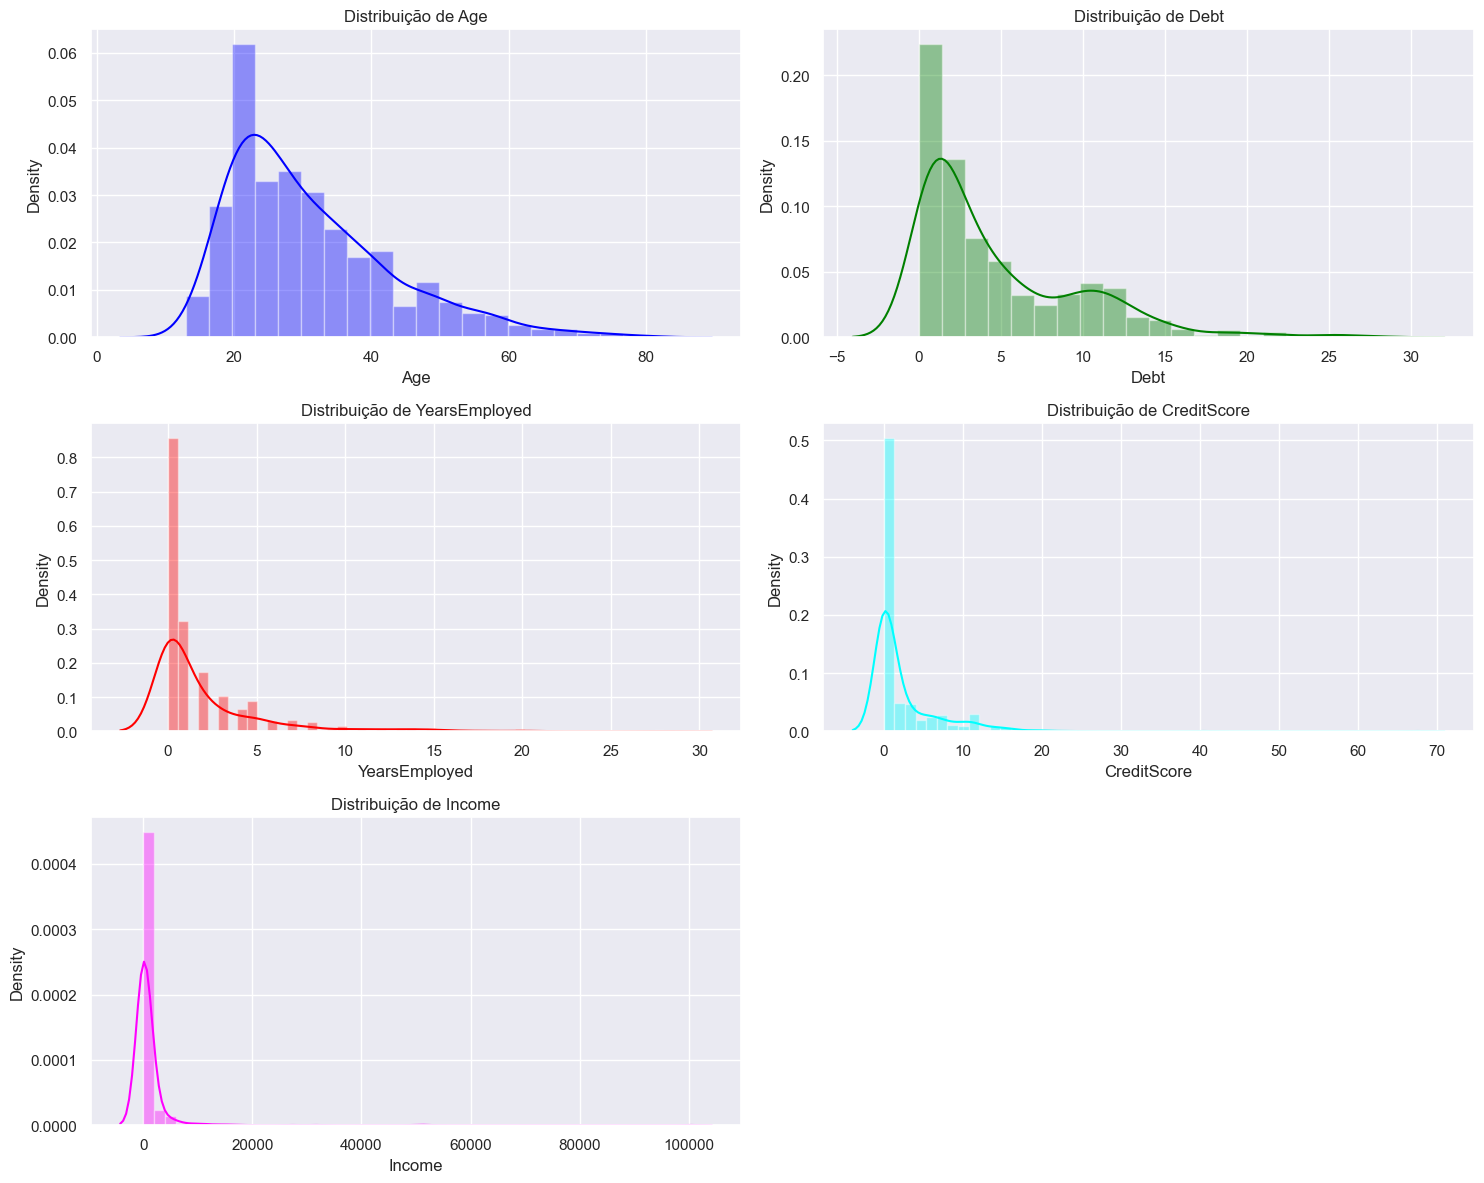

In [55]:
plot_multiple_distplots_subplots(X_new, col, cores)

In [56]:
def plot_multiple_boxplot_subplots(dataframe, columns,colors,n_cols=2):
    n = len(columns)
    plt.figure(figsize=(15,10))
    for i,col in enumerate(columns):
        plt.subplot(n//n_cols + 1, n_cols, i+1)
        sns.boxplot(dataframe[col], color=colors[i])
        plt.xlabel(col)
        plt.title(f'Boxplot para {col}')
    plt.tight_layout()
    plt.show()

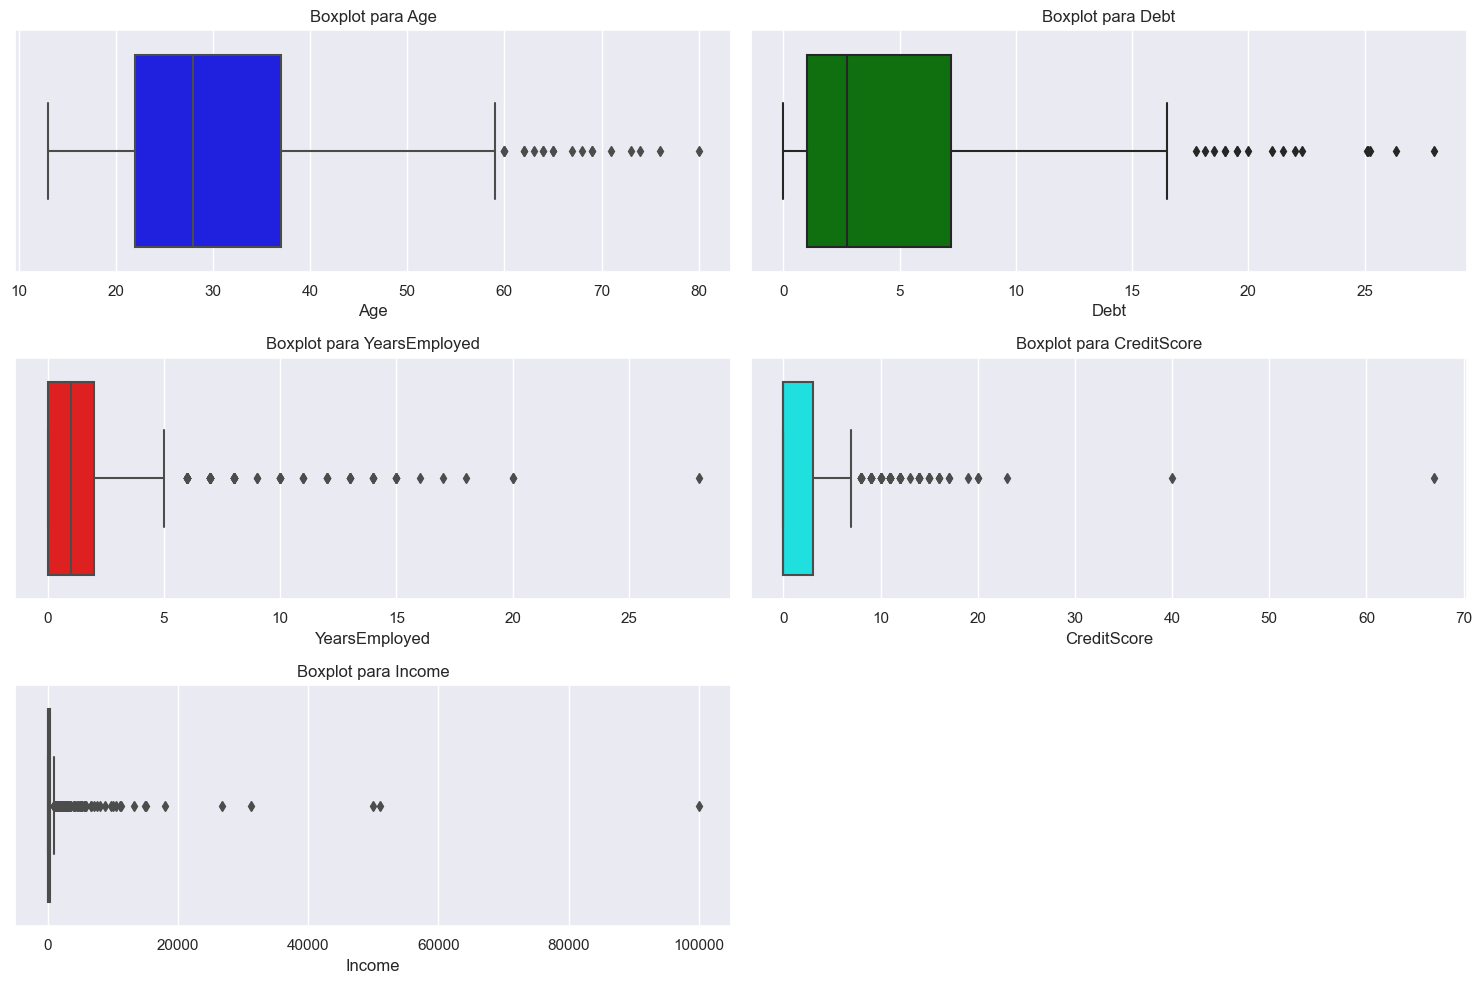

In [57]:
plot_multiple_boxplot_subplots(X_new, col, cores)

# Padronização dos novos dados de treino e teste

Padronização de dados é um processo importante na preparação dos dados para modelos de aprendizado de máquina. O objetivo é colocar todas as características em uma escala comum, geralmente com uma média de 0 e desvio padrão de 1. Isso é importante porque muitos algoritmos de aprendizado de máquina são sensíveis à escala dos dados e podem ser afetados por características com diferentes unidades ou intervalos de valores. A padronização pode ser realizada utilizando a técnica Z-score ou normalização. É importante notar que a padronização deve ser aplicada aos dados de treinamento e também aos dados de teste, para garantir que o modelo não seja exposto a dados não vistos antes.

In [58]:
# Nova divisão de treino e teste
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [59]:
X_new_train.shape

(483, 6)

In [60]:
X_new_test.shape

(207, 6)

In [61]:
# Padronização dos novos dados de treino 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_new_train)
X_test_scaled = ss.transform(X_new_test)


In [62]:
X_train_scaled.shape

(483, 6)

In [63]:
X_test_scaled.shape

(207, 6)

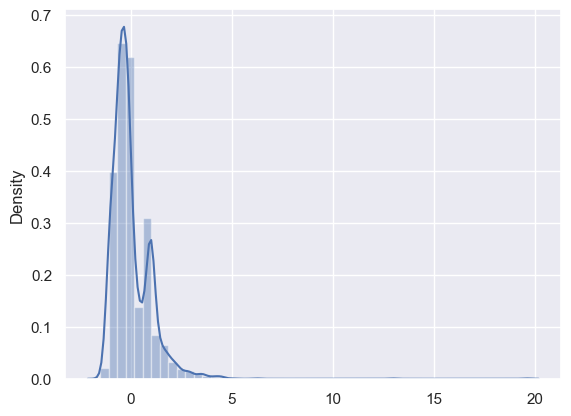

In [64]:
# Distribuição dos dados de treino após padronização
sns.distplot(X_train_scaled)
plt.show()

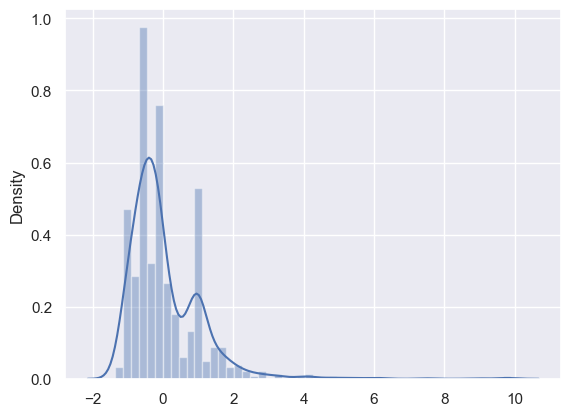

In [65]:
# Distribuição dos dados de teste após padronização
sns.distplot(X_test_scaled)
plt.show()

# Construção do modelo: versão (V2) com SVM

In [66]:
from sklearn import svm
model_v2 = svm.SVC(kernel='linear',C = 0.01)
model_v2.fit(X_train_scaled,y_train)
y_pred_v2 = model_v2.predict(X_test_scaled)

In [67]:
print("Decision Tree Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_pred_v2))
print("Precision: ", precision_score(y_test, y_pred_v2))
print("Recall: ", recall_score(y_test, y_pred_v2))
print("F1 Score: ", f1_score(y_test, y_pred_v2))

Decision Tree Metrics:
Accuracy:  0.8405797101449275
Precision:  0.7807017543859649
Recall:  0.9175257731958762
F1 Score:  0.8436018957345972


In [68]:
svm_acc = accuracy_score(y_test, y_pred_v2)
svm_acc

0.8405797101449275

In [69]:
pd.DataFrame({'Valor Atual':y_test,'Valor Previsto':y_pred_v2}).head()

,Valor Atual,Valor Previsto
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0


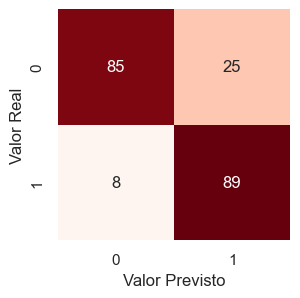

In [70]:
plt.figure(figsize=(3, 3))
# Constrói a matriz de confusão
matrix = confusion_matrix(y_test, y_pred_v2)
# Cria o gráfico
sns.heatmap(matrix, annot=True, cmap="Reds", fmt="d", cbar=False)
# Adiciona rótulos aos eixos
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
# Exibi o gráfico
plt.show()

# Construção do modelo: versão (V3) com DecisionTreeClassifier

In [71]:
  # Decision Tree
model_v3 = DecisionTreeClassifier()
model_v3.fit(X_train_scaled, y_train)
y_pred_v3 = model_v3.predict(X_test_scaled)

In [72]:
print("Decision Tree Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_pred_v3))
print("Precision: ", precision_score(y_test, y_pred_v3))
print("Recall: ", recall_score(y_test, y_pred_v3))
print("F1 Score: ", f1_score(y_test, y_pred_v3))

Decision Tree Metrics:
Accuracy:  0.7971014492753623
Precision:  0.8235294117647058
Recall:  0.7216494845360825
F1 Score:  0.7692307692307693


In [73]:
dt_acc = accuracy_score(y_test, y_pred_v3)
dt_acc

0.7971014492753623

In [74]:
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_v3))

Confusion Matrix:
 [[95 15]
 [27 70]]


In [75]:
pd.DataFrame({'Valor Atual':y_test,'Valor Previsto':y_pred_v3}).head()

,Valor Atual,Valor Previsto
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0


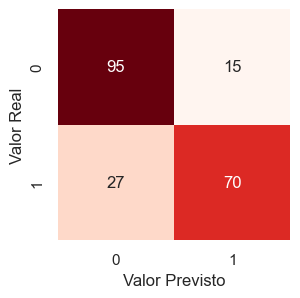

In [76]:
plt.figure(figsize=(3, 3))
# Constrói a matriz de confusão
matrix = confusion_matrix(y_test, y_pred_v3)
# Cria o gráfico
sns.heatmap(matrix, annot=True, cmap="Reds", fmt="d", cbar=False)
# Adiciona rótulos aos eixos
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
# Exibi o gráfico
plt.show()

In [77]:
def plot_accuracies(accuracies: dict):
    """
    Plota gráfico de barras com dados de acurácia de diferentes modelos de machine learning.
    
    :param accuracies: dicionário com os nomes dos modelos como chaves e suas respectivas acurácias como valores
    """
    # obtém os nomes dos modelos e as acurácias
    models = list(accuracies.keys())
    values = list(accuracies.values())
    
    # cria o gráfico
    plt.bar(models, values)
    plt.xlabel("Modelos")
    plt.ylabel("Acurácia")
    plt.ylim(0, 1) # limite máximo de 0 a 1 para a acurácia
    plt.title("Comparação de desempenho entre modelos")
    plt.show()

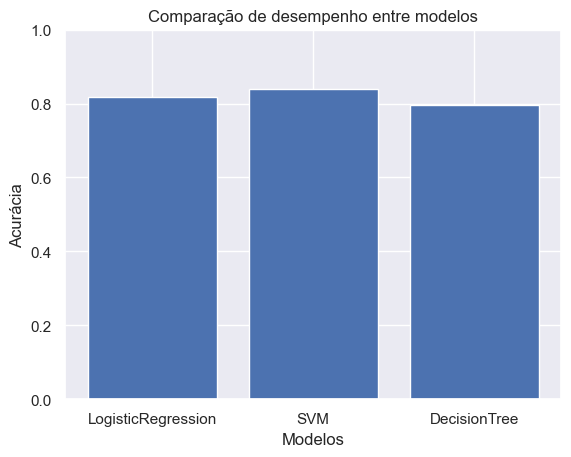

In [78]:
accuracies = {"LogisticRegression": log_acc, "SVM": svm_acc, "DecisionTree": dt_acc}
plot_accuracies(accuracies)